## Introduction to scikit learn

## 0. An end to end scikit learn workflow

In [13]:
#1. Get the data ready
import numpy as np
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X (features matrix)
X = heart_disease.drop("target",axis=1)

In [4]:
# Create Y (labels)
Y = heart_disease["target"]

In [6]:

Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
# 2. Choose the right model and hyperparameters (This is a classification problem)
from sklearn.ensemble import RandomForestClassifier   #import a model
clf = RandomForestClassifier()   #Create a object of the model

#Checking the default parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
# 3. Fit the model to training data
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [11]:
clf.fit(X_train,Y_train);

In [14]:
# Make a prediction
Y_label = clf.predict(np.array([1,2,3,4])) 


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Cannot make predictions on arrays of different shape than X_train or X_test

In [15]:
y_preds = clf.predict(X_test)

In [16]:
y_preds

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [17]:
#evaluate the model/ Check how well its working on training data and test data seperately
clf.score(X_train,Y_train)

1.0

In [18]:
clf.score(X_test,Y_test)

0.819672131147541

## Another method of evaluating the model


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.80      0.91      0.85        35

    accuracy                           0.82        61
   macro avg       0.83      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



In [26]:
confusion_matrix(Y_test,y_preds)

array([[18,  8],
       [ 3, 32]], dtype=int64)

In [27]:
accuracy_score(Y_test,y_preds)

0.819672131147541

In [31]:
# 5. improving the models
# try different amount of n_estimators

np.random.seed(42)

for i in range(10,100, 10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,Y_test)*100}")
    print("")
    

Trying model with 10 estimators..
Model accuracy on test set: 78.68852459016394

Trying model with 20 estimators..
Model accuracy on test set: 83.60655737704919

Trying model with 30 estimators..
Model accuracy on test set: 80.32786885245902

Trying model with 40 estimators..
Model accuracy on test set: 78.68852459016394

Trying model with 50 estimators..
Model accuracy on test set: 80.32786885245902

Trying model with 60 estimators..
Model accuracy on test set: 78.68852459016394

Trying model with 70 estimators..
Model accuracy on test set: 78.68852459016394

Trying model with 80 estimators..
Model accuracy on test set: 78.68852459016394

Trying model with 90 estimators..
Model accuracy on test set: 75.40983606557377



In [33]:
# Best is with 20 estimators
# Save the model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb")) # wb = write binary

In [34]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb")) # rb = read binary
loaded_model.score(X_test,Y_test)

0.7540983606557377

In [2]:
#Standard Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Getting your data ready to be used with machine leaning
 Three main things:
        1. split the data inton features and labels (X and Y)
        2. Fill the missing values(imputing) or disregarding missing values
        3. Converting non numerical values to numerical( Feature encoding)

In [4]:
heart_disease = pd.read_csv("heart-disease.csv")

In [5]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
X = heart_disease.drop("target",axis=1)

In [7]:
y = heart_disease["target"]

In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [10]:
## Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)



In [11]:
X_train.shape

(242, 13)

In [12]:
X_test.shape

(61, 13)

In [14]:
y_train.shape

(242,)

In [15]:
y_test.shape

(61,)

## Make the entire data numerical

In [19]:
car_sales = pd.read_csv("car-sales-extended.csv")

In [20]:
car_sales


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [3]:
car_sales

NameError: name 'car_sales' is not defined

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
car_sales = pd.read_csv("car-sales-extended.csv")


In [9]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [11]:
from sklearn.model_selection import train_test_split

X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [17]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [23]:
#Split the data again
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=.2)

In [20]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
model.score(X_test,y_test)

0.22850843305567656

## Handling missing data with pandas
1. Fill them with some values (imputation)
2. Remove the samples with missing data (Entire row)

In [25]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [26]:
car_sales_missing.isna().sum()  # sum of mising values in all the columns

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [27]:
#Convert the data to numbers
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

In [29]:
#Input contains NaN. So we have to handle missing values



## Fill Missing data with pandas

In [38]:
car_sales_missing["Make"].fillna("missing", inplace=True)

car_sales_missing["Colour"].fillna("missing", inplace=True)


car_sales_missing["Doors"].fillna(4, inplace=True)

In [39]:
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

In [41]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [42]:
# Remove rows with missing price values

car_sales_missing.dropna(inplace=True)

In [44]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [45]:
len (car_sales_missing)

950

In [47]:
# Now no msising data is present. 50 rows removed for sake of completion
# refit the data to model again
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]


In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [49]:
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [56]:
# Fit the model to data
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)

In [57]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [58]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
model.score(X_test,y_test)

0.1466228003744976

In [60]:
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

## Fill the missing values with scikit-learn

In [61]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [62]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [64]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [67]:
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [68]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [71]:
#Split it into X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [76]:
#Filling missing values with scikit learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing ' and numerical with mean

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define the columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]


#create an imputer
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer", num_imputer,num_features)
])

#Transforme the data
filled_X = imputer.fit_transform(X)
filled_X



array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [83]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make","Colour","Odometer (KM)","Doors"])

In [84]:
car_sales_filled.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [85]:
car_sales_filled.isna().sum()   # Done filling the missing values

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [86]:
#Convert into numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x913 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [88]:
# We got  filled data and totally numerical. fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()



In [91]:
y.isna().sum()

0

In [97]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)

In [98]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [101]:
model.score(X_test,y_test)   # More data is required

-0.012425280142229989

In [102]:
len(car_sales_filled)

950

## 2. Choosing the right machine learning model/estimator

In [104]:
# Picking a model for regression problem

In [105]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [106]:
# Converting boston dataset(dictionary) into pandas dataframe
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [107]:
len (boston_df)

506

In [108]:
#Model depends on the size

In [110]:
# Try Ridge Regression (sklearn ml maps documentation)
from sklearn.linear_model import Ridge

np.random.seed(42)

#Create the data
X  = boston_df.drop("target",axis=1)
y  = boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = Ridge()
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.6662221670168519

In [111]:
# To improve the score. Try with another model
# Try Random Forest Regressor

In [114]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8896648705127477

## Picking a model for classification problem

In [117]:
#heart disease problem
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [119]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [120]:
disease_df = pd.DataFrame(heart_disease)

In [121]:
disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [122]:
len(disease_df)

303

In [123]:
#Create data
X = disease_df.drop("target",axis=1)
y = disease_df["target"]

#train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [124]:
# try support vector machines
from sklearn import svm
model = svm.SVC()

In [125]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [126]:
y_preds = model.predict(X_test)

In [127]:
model.score(X_test,y_test)    ## 73..77 % accuracy

0.7377049180327869

In [128]:
# Trying with random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)    # 83 % efficiency

0.8360655737704918

## Making predictions with trained machine learning model

In [130]:
# 2 ways:
#1.Predict()
#2. predict_proba()


In [131]:
clf.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [132]:
np.array(y_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [134]:
#Compare predictions to actual data
y_preds = clf.predict(X_test)
np.mean(y_preds==y_test)

0.8360655737704918

In [135]:
clf.score(X_test,y_test)

0.8360655737704918

In [137]:
# Make predictions with predict_proba() - it returns the probabilies of the classes in classification model

In [140]:
clf.predict_proba(X_test[:5])   # returns categorical probabilty of a data element

array([[0.02, 0.98],
       [0.5 , 0.5 ],
       [0.04, 0.96],
       [0.09, 0.91],
       [0.17, 0.83]])

In [141]:
clf.predict(X_test[:5])

array([1, 0, 1, 1, 1], dtype=int64)

 ## `predict()` can also be  used for regression models

In [145]:
# try predicting on botston dataset

In [146]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [149]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [150]:
model.score(X_test,y_test)  # Nice accuracy

0.873969014117403

In [151]:
y_preds = model.predict(X_test)

In [152]:
y_preds[:5]

array([23.002, 30.826, 16.734, 23.467, 16.853])

In [153]:
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: target, dtype: float64

## 4. Evaluating a machine learning model

In [155]:
# 1. Estimator score method
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = disease_df.drop("target",axis=1)
y = disease_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [156]:
clf.score(X_test,y_test)   # Returns meana accuracy

0.8524590163934426

In [159]:
#2. Scoring parameter method

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = disease_df.drop("target",axis=1)
y = disease_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
cross_val_score(clf,X,y)   # cross validation is better as compared toscore

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [160]:
cross_val_score(clf,X,y, cv=5, scoring=None)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

## Classification Model Evaluation matrix
 
 /1.Accuracy
 2. Area under ROC curve
 3. Confusion Matrix
 4. Classification report

In [162]:
# Accuracy
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = disease_df.drop("target",axis=1)
y = disease_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
accuracy = cross_val_score(clf,X,y,cv=5)

In [163]:
np.mean(accuracy)

0.811639344262295

In [164]:
print(f"Cross validated accuracy : {np.mean(accuracy)*100:2f}")

Cross validated accuracy : 81.163934


** Area under ROC curve( Reciever operating characteristic)**

# ROC curvees are comparison of model's true positive rate versus false positive rate
* True positive  = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predecits 0 when truth is 0

In [169]:
from sklearn.metrics import roc_curve
#make predictions with probablities

y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [171]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

In [173]:
#calculate fpr tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

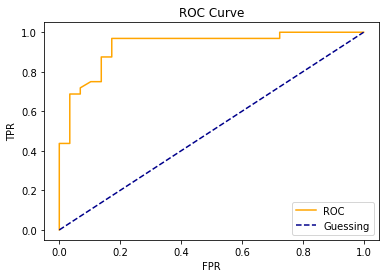

In [177]:
# plotting roc curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr, color="orange", label="ROC")
    
    #plot the baseline
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--",label="Guessing")
    #customize the plot
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

## Confusion Matrix

In [178]:
# Basically confusion matrix gives the idea where the model is confused. Used to compare the predicted labels and actual labels(targets)
from sklearn.metrics import confusion_matrix
y_preds  = clf.predict(X_test)

In [179]:
confusion_matrix(y_test,y_preds)     # Rows = Actual labels, Cols = predicted labels

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [ ]:
## Installing a module from jupyter notebook

import sys
!conda install --yes --prefix {sys.prefix} seaborn

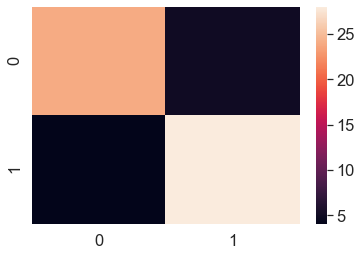

In [184]:
# Make confusion matrix more visual with seaborn's heatmap
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test,y_preds)

#plot using seabor n
sns.heatmap(conf_mat);

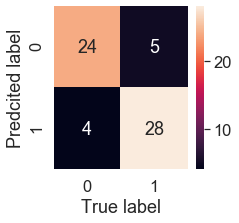

In [185]:
def plot_conf_mat(conf_mat):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot =True,cbar="False")
    plt.xlabel("True label")
    plt.ylabel("Predcited label");

plot_conf_mat(conf_mat)

## classification Report


In [187]:
# Collection of many evaluation parameters
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Evaluating a regression model


In [188]:
# R^2 (r-sqaured) or coeeficent of determination
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [189]:
model.score(X_test,y_test)

0.873969014117403

In [190]:
# R^2 compares your model's prediction to the mean of the targets.

# Mean absolute error

In [191]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)

In [192]:
mae

2.1226372549019623

In [194]:
df

,Actual,Predicted
23.002,NaN,NaN
30.826,NaN,NaN
16.734,NaN,NaN
23.467,NaN,NaN
16.853,NaN,NaN
...,...,...
13.030,NaN,NaN
12.490,NaN,NaN
13.406,NaN,NaN
20.219,NaN,NaN


# Scoring parameter

In [197]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = disease_df.drop("target",axis=1)
y = disease_df["target"]
clf = RandomForestClassifier()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [198]:
clf.score(X_test,y_test)

0.8524590163934426

In [201]:
cv_score = cross_val_score(clf,X,y,cv=5)

In [202]:
cv_score

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [209]:
# mean cv_score is
print(np.mean(cv_score)*100)

81.83606557377048


In [208]:
cv_score = cross_val_score(clf,X,y,cv=5,scoring="accuracy")

In [211]:
# precison parameter
cv_prec = cross_val_score(clf,X,y, cv=5,scoring="precision")
np.mean(cv_prec)*100

82.92982456140352

In [214]:
# Recall parameter
cv_recall  =cross_val_score(clf,X,y,cv=5,scoring="recall")
np.mean(cv_recall)

0.8727272727272727

In [215]:
# f1 paramter (Combination of precision and recall)
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
np.mean(cv_f1)

0.8388554082903399

## Checking on regression model with scoring parameter

In [226]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

In [218]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [227]:
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

In [228]:
#train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [222]:
model  =RandomForestRegressor()

In [229]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [230]:
model.score(X_test,y_test)

0.873969014117403

In [232]:
cv_r2 = cross_val_score(model,X,y,cv=5,scoring =None)
cv_r2

array([0.75909537, 0.84959941, 0.75551512, 0.45660835, 0.23564758])

In [233]:
cv_r2 = cross_val_score(model,X,y,cv=5,scoring ="r2")
cv_r2

array([0.77410954, 0.85103906, 0.71313599, 0.46958144, 0.2626839 ])

In [234]:
cv_mae = cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.14871569, -2.58156436, -3.27114851, -3.81082178, -3.22189109])

In [237]:
## Summary of model evaluation (Use sklearn metrics function)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
clf = RandomForestClassifier()
X = disease_df.drop("target",axis=1)
y = disease_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)

# Evaluate the classifier
print(f"Classifier metrics on the test set")
print(f"Accuracy score : {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision score : {precision_score(y_test,y_preds)*100:.2f}%")
print(f"Recall score : {recall_score(y_test,y_preds)*100:.2f}%")
print(f"f1 score : {f1_score(y_test,y_preds)*100:.2f}%")

Classifier metrics on the test set
Accuracy score : 85.25%
Precision score : 84.85%
Recall score : 87.50%
f1 score : 86.15%


## Improving a model

first prediction  = baseline prediction
first model = baseline model

Data perspective
1. can we get more data
2. can we improve our data

Model perspective
1. Can we change/improve model

*Parameters = model finds these parameters in data

*Hyperparameters = settings on a model you can adjust to improve its ability to find patterns
# Three ways to adjust hyperparameters

* By Hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [238]:
clf.get_params()  # hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Tuning hyperparameter by hand

In [240]:
# make three sets: training,validation,test

we will adjust:

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators


In [245]:
def evaluate_preds(y_true,y_preds):
    # This function performs comparison on y_true labels vs y_preds labels
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {
        "accuracy": round(accuracy,2),
        "precision": round(precision,2),
        "recall": round(recall,2),
        "f1": round(f1,2)
        
    }


    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Prec: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"f1: {f1*100:.2f}%")
    
    return metric_dict
                
    
    

In [246]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
# we have to split the data into train,test and validation set
disease_df_shuffled = disease_df.sample(frac=1)

X = disease_df_shuffled.drop("target",axis=1)
y = disease_df_shuffled["target"]

#split into train, test, and validation set
train_split = round(0.7* len(disease_df_shuffled)) # 705 of the data
valid_split = round(train_split + 0.15*len(disease_df_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_preds = clf.predict(X_valid)  # on validation set


#evaluate the classifier on the validation set

baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics


Acc: 82.22%
Prec: 81.48%
Recall: 88.00%
f1: 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [247]:
np.random.seed(42)
# create a second classifer with different hyperparameters

clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(X_train,y_train)
y_preds2 = clf2.predict(X_valid)

clf2_metrics = evaluate_preds(y_valid,y_preds2)


Acc: 82.22%
Prec: 84.00%
Recall: 84.00%
f1: 84.00%


### Hyperparameter tuning using randomized searchcv

In [249]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators" :[10,100,200,500,1000],
    "max_depth" : [None,5,10,15,20],
    "max_features" : ["auto","sqrt"],
    "min_samples_split" : [2,4,6],
    "min_samples_leaf" : [1,2,4]
}
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier() # n_jobs = amount pf processor given for commputattion

rs_clf = RandomizedSearchCV(estimator=clf,param_distributions = grid,n_iter=10,cv=5,verbose=2)
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=15, total=   0.1s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   13.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [250]:
rs_clf.best_params_


{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 15}

In [251]:
# Make predictions with the best parameters . Best parameters are automatically selecrted
rs_y_preds = rs_clf.predict(X_test)

In [252]:
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 83.61%
Prec: 78.12%
Recall: 89.29%
f1: 83.33%


### Tuning hyperparameters with GridSearchCV

In [253]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [259]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
#X = .drop("target", axis=1)
#y = heart_disease_shuffled["target"]

# Split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Instantiate RandomForestClassifier
#clf = RandomForestClassifier(n_jobs=1)

# # Setup GridSearchCV
#gs_clf = GridSearchCV(estimator=clf,
  #                     param_grid=grid_2, 
 #                      cv=5,
   #                    verbose=2)

# Fit the GridSearchCV version of clf
#gs_clf.fit(X_train, y_train);    

# takes more time

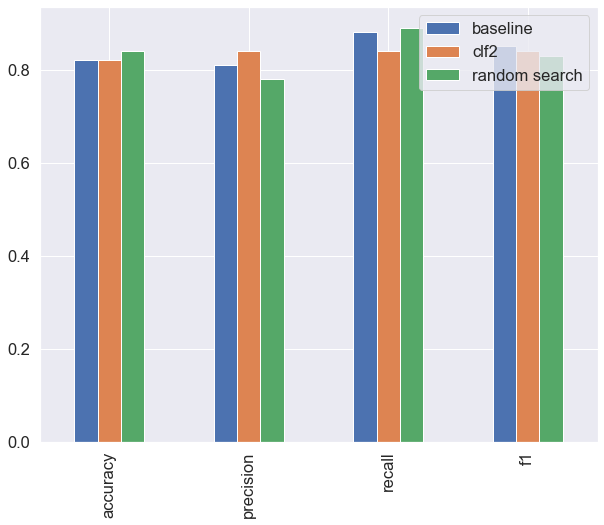

In [261]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf2": clf2_metrics,
                                "random search": rs_metrics
                                })

compare_metrics.plot.bar(figsize=(10, 8));

## Saving and loading a machine learning model

Two ways to save and load the model
* Python's pickle module
* With joblib module


In [262]:
import pickle

# save existing model to file
pickle.dump(clf,open("gs_random_forest_model.pkl","wb"))

In [263]:
# load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model.pkl","rb"))

In [265]:
#Make predictions


### joblib

In [266]:
from joblib import dump,load

#save model to file

dump(rs_clf,filename = "rs_model.joblib")

['rs_model.joblib']

In [270]:
loaded = load(filename="rs_model.joblib")

In [271]:
j_y_preds = loaded.predict(X_test)

In [272]:
evaluate_preds(y_test,j_y_preds)

Acc: 83.61%
Prec: 78.12%
Recall: 89.29%
f1: 83.33%


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}


# Finally . Putting it all together

In [274]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [275]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [276]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Steps we are required to do
1. Fill the missing data
2. Converting the data to numbers
3. Build a model on the data


In [278]:
#Getting the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

import numpy as np
np.random.seed(42)

#import data
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

#define features and transformers pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# create a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model", RandomForestRegressor())
])

# split
X = data.drop("Price",axis=1)
y = data["Price"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

In [280]:
# Using Grid Search CV to improve the model
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]   
}

gs_model = GridSearchCV(model, pipe_grid, cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=aut

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.0s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.9s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.6s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.6s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.5s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, mod

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [281]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'auto',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}

In [ ]:
gs_models.